# EulerRots.py demo

In [1]:
%matplotlib inline
import EulerRots as rotkit
# in order to work correctly, you need to have compiled the fortran routines Rotkit_f for your machine
import os
import pandas as pd
import numpy as np

#only needed for the plots
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

Tab-delimited files consisting of sets of finite rotations for different plate pairs are built into a rotation model using the rotsets_from_file function, which generates an initial list of FiniteRotationSet objects. 

The original rotation file contains a set of absolute plate rotations for Nubia relative to the Indo-Atlantic hotspot reference frame according to the 'fixed hotspot' model of O'Neill et al. (2005). A second rotation model which instead has the 'moving hotspot' rotations from the same paper can be set up by creating a copy of the original, then swapping in the new hotspot rotations from another file. The insert_rots() function detects that the plate pair for the new rotationset is already represented, and by default asks if you want to substitute in the new one or not. Setting ask to 'False' skips the prompt.

In [4]:
rotmodel=rotkit.EulerRotationModel(rotkit.rotsets_from_file('./Datafiles/GlobalRots.txt'))

rotmodel2=rotkit.EulerRotationModel(rotmodel.rotationsets)
#remove ask=False or set it to True to get a Y/n prompt before replacement.
rotmodel2.insert_rots(rotkit.rotsets_from_file('./Datafiles/NUB_MANTmoving_rots.txt'), ask=False) 

Duplicate of finite rotation set for 701-1found: replaced by new set.


The .summary() command gives the basic details for the sets of finite rotations in the rotation model. Note how the order has changed in rotmodel2 due the removal and replacement of the Nubia/Indo-Atlantic hotspot rotations 

In [3]:
rotmodel.summary()

,MovingPlate,MovingPlateName,FixedPlate,FixedPlateName,N,Youngest,Oldest
0,101,North American Craton,701,African Craton,38,0.0,154.300
1,201,South American Craton,701,African Craton,14,0.0,83.000
2,301,Northern European Craton and Eurasia,101,North American Craton,30,0.0,79.075
3,501,Indian Craton,709,Somalia Plate,35,0.0,64.745
4,503,Arabia,709,Somalia Plate,10,0.0,83.000
5,511,Central Indian Basin,709,Somalia Plate,35,0.0,64.745
6,701,African Craton,1,Indo-Atlantic Hotspots (Present Day),12,0.0,120.000
7,709,Somalia Plate,701,African Craton,7,0.0,83.000
8,801,Australia,802,Antarctica and East Antarctica,19,0.0,83.000
9,802,Antarctica and East Antarctica,709,Somalia Plate,22,0.0,83.000


In [4]:
rotmodel2.summary()

,MovingPlate,MovingPlateName,FixedPlate,FixedPlateName,N,Youngest,Oldest
0,101,North American Craton,701,African Craton,38,0.0,154.300
1,201,South American Craton,701,African Craton,14,0.0,83.000
2,301,Northern European Craton and Eurasia,101,North American Craton,30,0.0,79.075
3,501,Indian Craton,709,Somalia Plate,35,0.0,64.745
4,503,Arabia,709,Somalia Plate,10,0.0,83.000
5,511,Central Indian Basin,709,Somalia Plate,35,0.0,64.745
6,709,Somalia Plate,701,African Craton,7,0.0,83.000
7,801,Australia,802,Antarctica and East Antarctica,19,0.0,83.000
8,802,Antarctica and East Antarctica,709,Somalia Plate,22,0.0,83.000
9,804,Marie Byrdland (Ross Terrane) and West Antarctica,802,Antarctica and East Antarctica,7,0.0,83.000


Each EulerRotationModel is a collection of FiniteRotationSets, which are themselves a collection of EulerRotations:

In [5]:
rotmodel.rotationsets

In [6]:
rotmodel.rotationsets[0].summary()

,MovingPlate,FixedPlate,StartAge,EndAge,RotLat,RotLong,RotAng
0,101,701,0,0.000,-77.86,207.09,0.000
1,101,701,0,0.780,-77.86,207.09,0.182
2,101,701,0,1.770,-77.79,208.99,0.408
3,101,701,0,2.581,-78.32,211.01,0.601
4,101,701,0,3.580,-78.74,237.97,0.782
5,101,701,0,4.180,-78.65,224.07,0.964
6,101,701,0,5.230,-79.29,224.81,1.176
7,101,701,0,5.894,-79.74,227.43,1.343
8,101,701,0,6.567,-79.85,228.27,1.504
9,101,701,0,7.432,-80.39,225.37,1.724


In [7]:
rotmodel.rotationsets[0].rotations

In [8]:
rotmodel.rotationsets[0].rotations[4].details()

MovingPlate                         101
FixedPlate                          701
Timescale                     Undefined
StartChron                         None
EndChron                         2An.3o
StartAge                              0
EndAge                             3.58
RotLat                           -78.74
RotLong                          237.97
RotAng                            0.782
Kappahat                              1
a                              2.32e-08
b                               3.7e-09
c                             -1.16e-09
d                              4.66e-09
e                             -1.74e-09
f                              2.99e-09
Points                              897
Segs                                 59
Plates                                2
DOF                                 774
Source         Merkouriev & Demets 2014
dtype: object

In [9]:
rotmodel.rotationsets[0].rotations[4].Covariances

Kappahat    1.000000e+00
a           2.320000e-08
b           3.700000e-09
c          -1.160000e-09
d           4.660000e-09
e          -1.740000e-09
f           2.990000e-09
dtype: float64

In addition to simple operations (add, interpolate, invert etc.) there are more complex functions which do the hard work of generating useful products. For the present, the most useful for you are probably get_rots and synthetic_APWP: 

In [10]:
ages=np.arange(10,121,10).tolist()
result=rotmodel.get_rots(101,1,ages)
result.summary()

,MovingPlate,FixedPlate,StartAge,EndAge,RotLat,RotLong,RotAng
0,101,1,0.0,0.0,-80.099762,165.044444,0.000000
1,101,1,0.0,10.0,-80.099762,165.044444,3.514117
2,101,1,0.0,20.0,-71.649999,145.646042,8.619361
3,101,1,0.0,30.0,45.983549,85.085372,5.464017
4,101,1,0.0,40.0,56.219305,79.181346,8.133418
5,101,1,0.0,50.0,54.710520,122.754691,16.622270
6,101,1,0.0,60.0,52.042506,119.435353,19.320818
7,101,1,0.0,70.0,53.341250,109.194234,18.878964
8,101,1,0.0,80.0,57.158111,102.973139,21.928720
9,101,1,0.0,90.0,62.360178,112.744141,32.533444


In [11]:
path=rotmodel.synthetic_APWP(101,1,ages)
path

,Name,PlateCode,FeatureAge,ReconstructionAge,Lat,Lon,MaxError,MinError,MaxBearing
0,VGP-10,101,10,0.0,89.396065,256.775149,0.754324,0.418243,-16.137840
1,VGP-20,101,20,0.0,87.288768,239.737393,0.853230,0.667135,107.643082
2,VGP-30,101,30,0.0,86.204031,173.119928,1.627906,0.905916,-37.130006
3,VGP-40,101,40,0.0,85.480298,165.799424,4.899437,2.659326,96.122746
4,VGP-50,101,50,0.0,80.419681,205.954926,4.636614,3.102257,-42.548164
5,VGP-60,101,60,0.0,78.151355,201.791137,4.247154,2.847922,115.016084
6,VGP-70,101,70,0.0,78.761284,191.597400,5.687736,3.449039,110.319880
7,VGP-80,101,80,0.0,78.158957,183.728174,6.565019,3.369222,104.320514
8,VGP-90,101,90,0.0,75.067067,188.250913,4.818819,3.185840,124.155529
9,VGP-100,101,100,0.0,71.401366,159.962178,2.499382,2.102078,21.851389


Just to show what this looks like, a quick comparison of the synthetic APWPs for the moving and fixed hotspot reference frame:

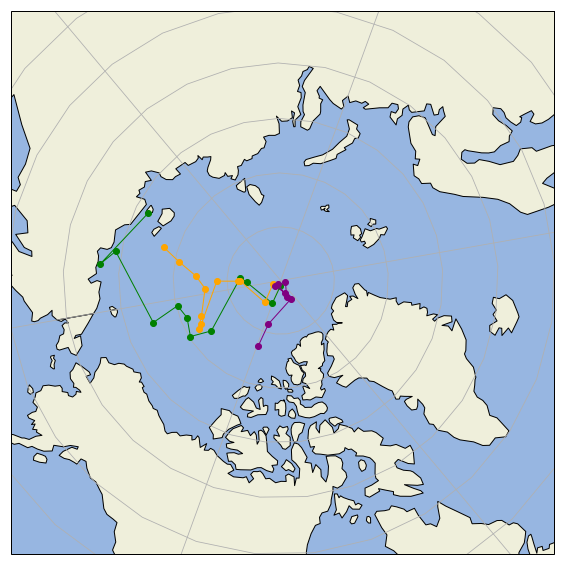

In [12]:
path2=rotmodel2.synthetic_APWP(101,1,ages)
path3=rotmodel.synthetic_APWP(101,3,ages)

plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(-100))
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax.gridlines()

plt.plot(path.Lon, path.Lat, 'o-',
         color='green', linewidth=1,
         transform=ccrs.Geodetic())

plt.plot(path2.Lon, path2.Lat, 'o-',
         color='orange', linewidth=1,
         transform=ccrs.Geodetic())

plt.plot(path3.Lon, path3.Lat, 'o-',
         color='purple', linewidth=1,
         transform=ccrs.Geodetic())

In [5]:
Kilauea=rotkit.Point(pd.Series(['Kilauea',901,0.,0.,19.421097,-155.286762],index=['Name','PlateCode','FeatureAge','ReconstructionAge','Lat','Lon']))

ages=np.arange(0,80,10).tolist()
Hawaii_Pac=Kilauea.flowline(ages,3,rotmodel,'Hawaii_Emperor_Pacfic','purple')
Hawaii_IAfixed=Kilauea.flowline(ages,1,rotmodel,'Hawaii_Emperor_Pacfic','green')
Hawaii_IAmoving=Kilauea.flowline(ages,1,rotmodel2,'Hawaii_Emperor_Pacfic','orange')


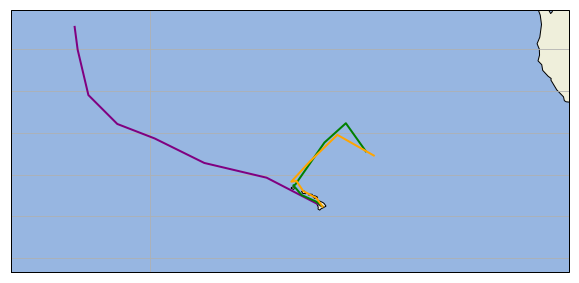

In [16]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([160., 240., 10., 40.])
ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax.gridlines()

Hawaii_Pac.mapplot()
Hawaii_IAfixed.mapplot()
Hawaii_IAmoving.mapplot()

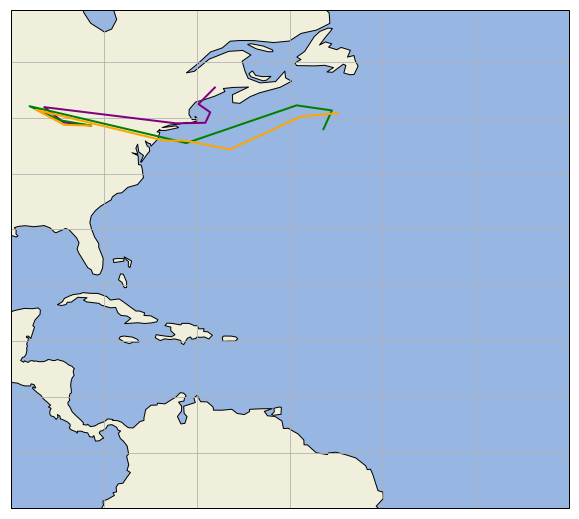

In [11]:
Kent=rotkit.Point(pd.Series(['Kent',101,0.,0.,41.15,-81.36],index=['Name','PlateCode','FeatureAge','ReconstructionAge','Lat','Lon']))
Kent_Pac=Kent.flowline(ages,3,rotmodel,'Kent_Pacfic','purple')
Kent_IAfixed=Kent.flowline(ages,1,rotmodel,'Kent_IA_fixed','green')
Kent_IAmoving=Kent.flowline(ages,1,rotmodel2,'Kent_IA_moving','orange')

plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-90, -30, 0, 50])
ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax.gridlines()

Kent_Pac.mapplot()
Kent_IAfixed.mapplot()
Kent_IAmoving.mapplot()

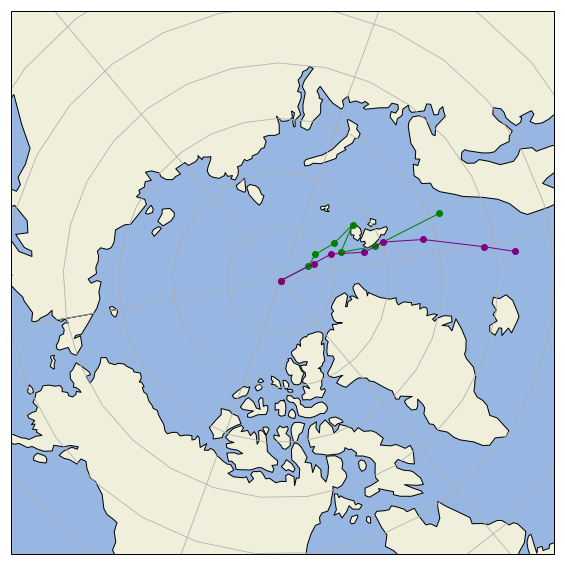

In [21]:
path4=rotmodel.synthetic_APWP(901,1,ages)
path5=rotmodel.synthetic_APWP(901,3,ages)

plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(-100))
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax.gridlines()

plt.plot(path4.Lon, path4.Lat, 'o-',
         color='green', linewidth=1,
         transform=ccrs.Geodetic())

plt.plot(path5.Lon, path5.Lat, 'o-',
         color='purple', linewidth=1,
         transform=ccrs.Geodetic())